{'00': 1024}


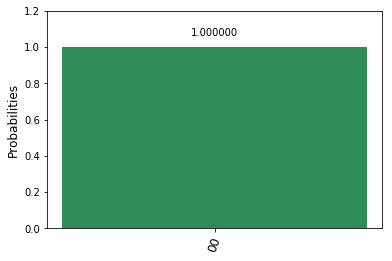

In [28]:
#------量子プログラム (0 + 0or1 = 0or1)　を計算する------#
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
qp = QuantumProgram()

#------量子ビット、回路用意------#
q = qp.create_quantum_register('q', 2)
c = qp.create_classical_register('c', 2)
cn = 'calc'
qc = qp.create_circuit(cn, [q], [c])

#------量子回路記述 (0 + 0or1 = 0or1)------#
#--初期状態定義部分--#
#0+0を計算したい場合
#このまま実行
#0+1を計算したい場合(下の1行を有効にする)
#qc.x(q[0])
#0+0, 0+1を同時に計算したい場合(下の1行を有効にする)
#qc.h(q[0])

#--計算部分--#
#制御NOTゲート
qc.cx(q[0], q[1])

#--測定部分--#
qc.measure(q[1], c[0])
qc.measure(q[0], c[1])
r = qp.execute(cn)

#------計算結果描画------#
print(r.get_counts(cn))
plot_histogram(r.get_counts(cn))

{'0000': 1024}


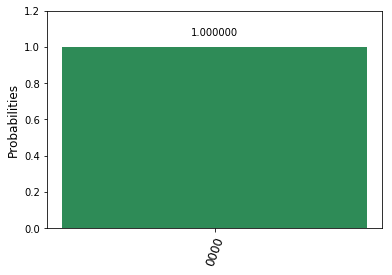

In [29]:
#------量子プログラム (0or1 + 0or1 = 0or1or2)　を計算する------#
#(参考URL)https://qiita.com/kjtnk/items/8385052a50e3154d1022
from qiskit import QuantumProgram
from qiskit.tools.visualization import plot_histogram
qp = QuantumProgram()

#------量子ビット、回路用意------#
q = qp.create_quantum_register('q', 4)
c = qp.create_classical_register('c', 4)
cn = 'calc'
qc = qp.create_circuit(cn, [q], [c])


#------量子回路記述 (0or1 + 0or1 = 0or1or2)------#
#--初期状態定義部分--#
#式左辺第1項のコントロール
#1を持たせる場合1行目をコメントアウト、0と1を持たせる場合2行目をコメントアウト
#qc.x(q[0])
#qc.h(q[0])

#左辺第2項のコントロール
#1を持たせる場合1行目をコメントアウト、0と1を持たせる場合2行目をコメントアウト
#qc.x(q[1])
#qc.h(q[1])

#--計算部分--#
#制御・制御NOTゲート（トフォリゲート）
qc.ccx(q[0], q[1], q[2])
#制御NOTゲート
qc.cx(q[0], q[2])
qc.cx(q[1], q[2])

#--測定部分--#
qc.measure(q[3], c[0])
qc.measure(q[2], c[1])
qc.measure(q[1], c[2])
qc.measure(q[0], c[3])

#------計算結果描画------#
r = qp.execute(cn)
print(r.get_counts(cn))
plot_histogram(r.get_counts(cn))